<a href="https://colab.research.google.com/github/NyomanDwipa/TUGAS_PCD3/blob/main/TUGAS_PCD3_F55122037.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


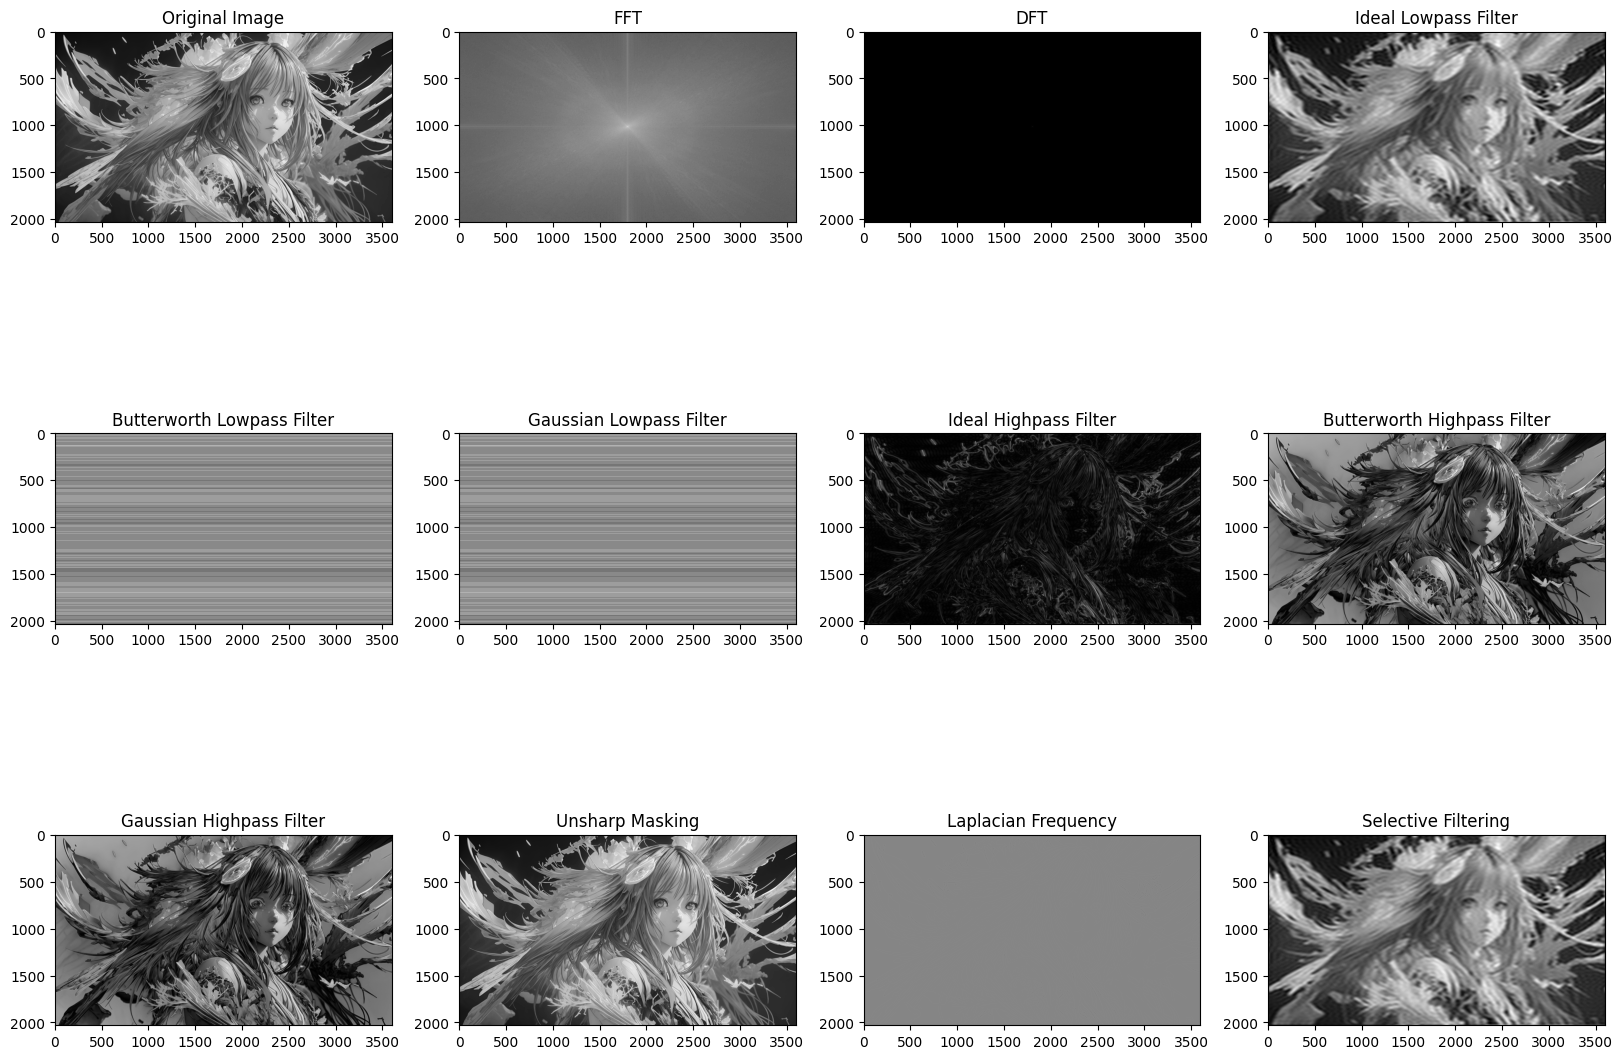

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def fft(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    return magnitude_spectrum

def dft(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.abs(fshift)
    return magnitude_spectrum

def ideal_lowpass_filter(image, d):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow - d:crow + d, ccol - d:ccol + d] = 1
    return mask

def butterworth_lowpass_filter(image, d, n):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            mask[i, j] = 1 / (1 + ((np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)) / d) ** (2 * n))
    return mask

def gaussian_lowpass_filter(image, d):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            mask[i, j] = np.exp(-((i - crow) ** 2 + (j - ccol) ** 2) / (2 * d ** 2))
    return mask

def ideal_highpass_filter(image, d):
    return 1 - ideal_lowpass_filter(image, d)

def butterworth_highpass_filter(image, d, n):
    return 1 - butterworth_lowpass_filter(image, d, n)

def gaussian_highpass_filter(image, d):
    return 1 - gaussian_lowpass_filter(image, d)

def unsharp_masking(image, alpha):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    mask = cv2.addWeighted(image, 1 + alpha, blurred, -alpha, 0)
    return mask

def laplacian_frequency(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    return laplacian

def selective_filtering(image, mask):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    fshift = fshift * mask
    f_ishift = np.fft.ifftshift(fshift)
    image_back = np.fft.ifft2(f_ishift)
    image_back = np.abs(image_back)
    return image_back

image = cv2.imread('/content/Goldenku.jpg', cv2.IMREAD_GRAYSCALE)

fft_result = fft(image)

dft_result = dft(image)

ideal_lp_filter = ideal_lowpass_filter(image, 50)
filtered_image_ideal_lp = selective_filtering(image, ideal_lp_filter)

butterworth_lp_filter = butterworth_lowpass_filter(image, 50, 2)
filtered_image_butterworth_lp = selective_filtering(image, butterworth_lp_filter)

gaussian_lp_filter = gaussian_lowpass_filter(image, 50)
filtered_image_gaussian_lp = selective_filtering(image, gaussian_lp_filter)

ideal_hp_filter = ideal_highpass_filter(image, 50)
filtered_image_ideal_hp = selective_filtering(image, ideal_hp_filter)

butterworth_hp_filter = butterworth_highpass_filter(image, 50, 2)
filtered_image_butterworth_hp = selective_filtering(image, butterworth_hp_filter)

gaussian_hp_filter = gaussian_highpass_filter(image, 50)
filtered_image_gaussian_hp = selective_filtering(image, gaussian_hp_filter)

unsharp_masked_image = unsharp_masking(image, 1.5)

laplacian_frequency_result = laplacian_frequency(image)

selective_filter_mask = ideal_lowpass_filter(image, 50)
selective_filtered_image = selective_filtering(image, selective_filter_mask)

plt.figure(figsize=(20, 20))

plt.subplot(4, 4, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(4, 4, 2)
plt.title("FFT")
plt.imshow(fft_result, cmap='gray')

plt.subplot(4, 4, 3)
plt.title("DFT")
plt.imshow(dft_result, cmap='gray')

plt.subplot(4, 4, 4)
plt.title("Ideal Lowpass Filter")
plt.imshow(filtered_image_ideal_lp, cmap='gray')

plt.subplot(4, 4, 5)
plt.title("Butterworth Lowpass Filter")
plt.imshow(filtered_image_butterworth_lp, cmap='gray')

plt.subplot(4, 4, 6)
plt.title("Gaussian Lowpass Filter")
plt.imshow(filtered_image_gaussian_lp, cmap='gray')

plt.subplot(4, 4, 7)
plt.title("Ideal Highpass Filter")
plt.imshow(filtered_image_ideal_hp, cmap='gray')

plt.subplot(4, 4, 8)
plt.title("Butterworth Highpass Filter")
plt.imshow(filtered_image_butterworth_hp, cmap='gray')

plt.subplot(4, 4, 9)
plt.title("Gaussian Highpass Filter")
plt.imshow(filtered_image_gaussian_hp, cmap='gray')

plt.subplot(4, 4, 10)
plt.title("Unsharp Masking")
plt.imshow(unsharp_masked_image, cmap='gray')

plt.subplot(4, 4, 11)
plt.title("Laplacian Frequency")
plt.imshow(laplacian_frequency_result, cmap='gray')

plt.subplot(4, 4, 12)
plt.title("Selective Filtering")
plt.imshow(selective_filtered_image, cmap='gray')

plt.show()
